In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport

In [2]:
# Loading a dataset
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [5]:
pf = ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Intializing the features and labels

x = df.drop(columns = 'quality')
y = df['quality']

In [7]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [8]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [9]:
# Dividing test and train dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 30)

In [10]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4
1189,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
...,...,...,...,...,...,...,...,...,...,...,...
919,8.4,0.620,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8
1164,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
500,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0
941,9.9,0.270,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.5


In [11]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1147,10.0,0.410,0.45,6.20,0.071,6.0,14.0,0.99702,3.21,0.49,11.8
659,7.1,0.840,0.02,4.40,0.096,5.0,13.0,0.99700,3.41,0.57,11.0
871,6.9,0.560,0.03,1.50,0.086,36.0,46.0,0.99522,3.53,0.57,10.6
1333,9.1,0.775,0.22,2.20,0.079,12.0,48.0,0.99760,3.18,0.51,9.6
1411,6.4,0.470,0.40,2.40,0.071,8.0,19.0,0.99630,3.56,0.73,10.6
...,...,...,...,...,...,...,...,...,...,...,...
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2
490,9.3,0.775,0.27,2.80,0.078,24.0,56.0,0.99840,3.31,0.67,10.6
575,12.3,0.270,0.49,3.10,0.079,28.0,46.0,0.99930,3.20,0.80,10.2
1051,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2


In [12]:
# Model Building
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)


DecisionTreeClassifier()

In [13]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

[Text(614.2140796481601, 1057.0, 'X[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(362.30186814073596, 996.6, 'X[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]'),
 Text(227.24285829567464, 936.2, 'X[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]'),
 Text(85.0223531310523, 875.8, 'X[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(59.243221433182704, 815.4000000000001, 'X[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(19.21239509360878, 755.0, 'X[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(11.527437056165269, 694.6, 'X[0] <= 7.1\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(7.684958037443512, 634.2, 'X[8] <= 3.435\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(3.842479018721756, 573.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(11.527437056165

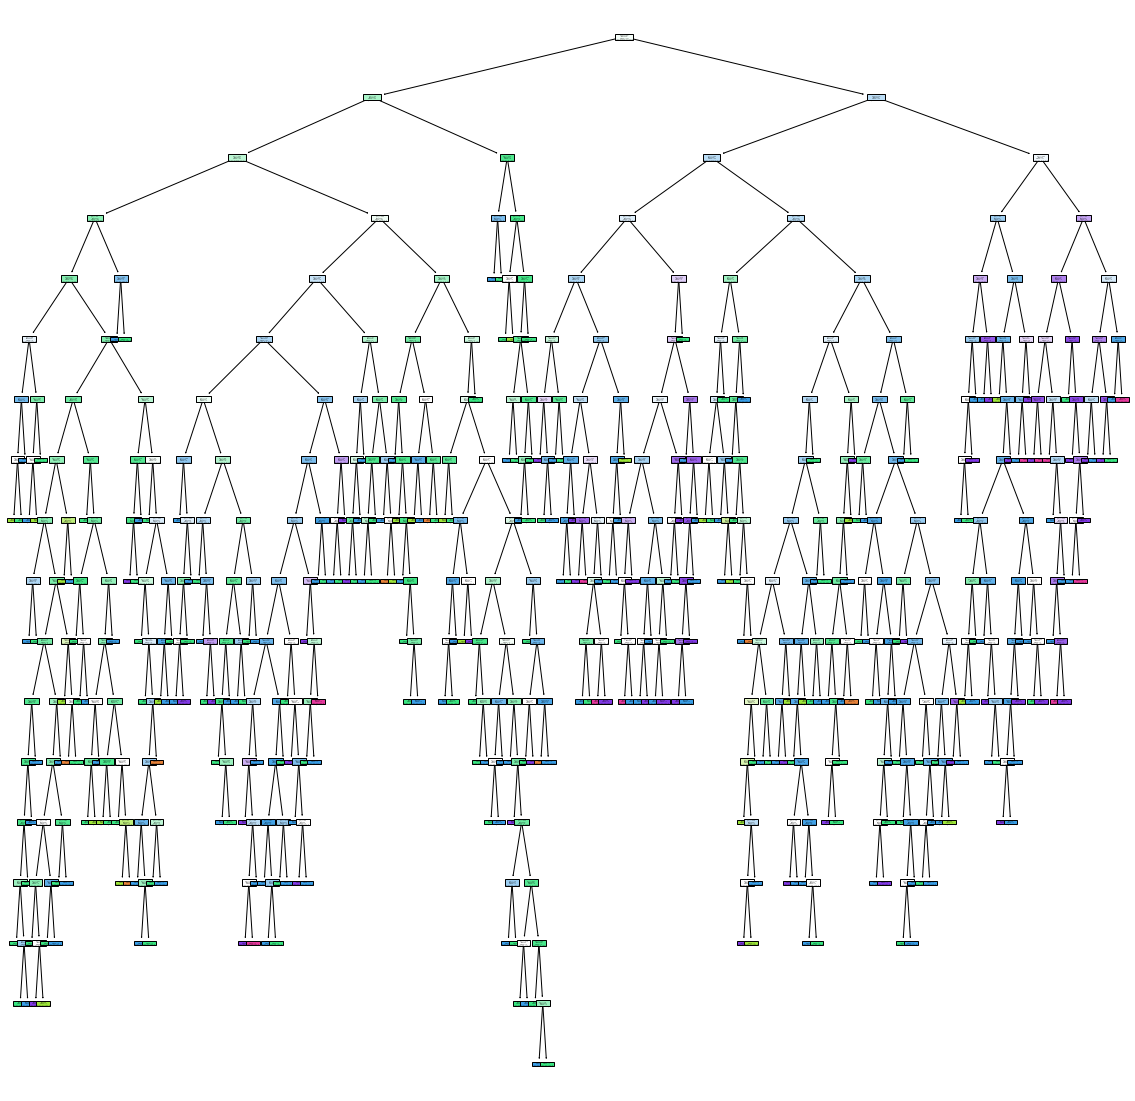

In [14]:
# Visualization of Decision Tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model, filled = True)

In [15]:
df1 = df.head(500)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8
496,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.9984,3.43,0.65,9.0,6
497,7.2,0.34,0.32,2.5,0.090,43.0,113.0,0.9966,3.32,0.79,11.1,5
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8


In [16]:
x1 = df1.drop(columns = 'quality')
y1 = df1['quality']

In [17]:
dt_model_1 = DecisionTreeClassifier()
dt_model_1.fit(x1,y1)

DecisionTreeClassifier()

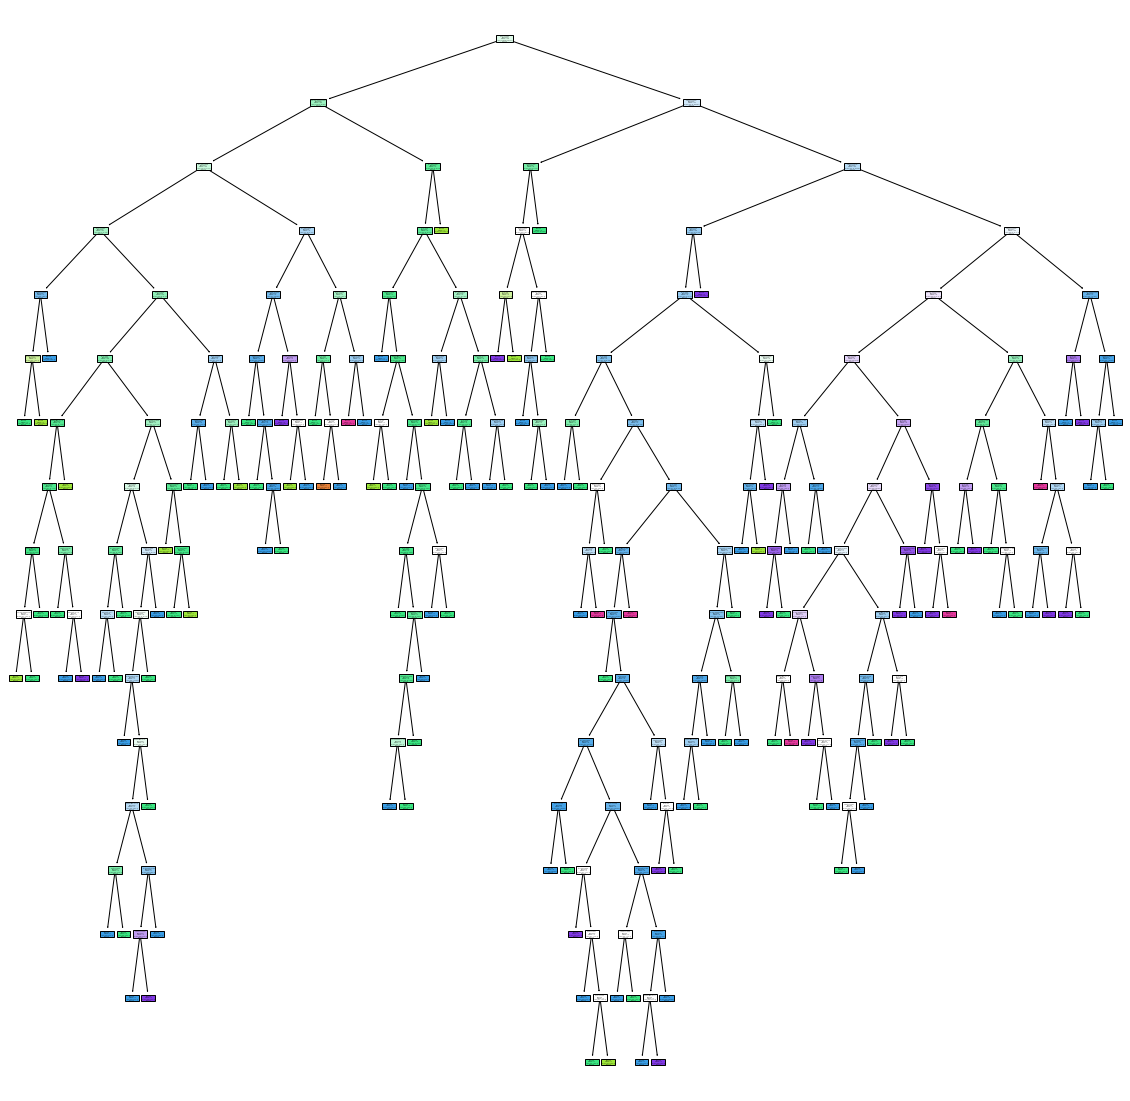

In [18]:
# Visualization of Decision Tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_1, filled = True, class_names = [str(i) for i in set(y1)], feature_names=x1.columns)
plt.savefig('dt_model_1')

In [20]:
 set(y1)

{3, 4, 5, 6, 7, 8}

In [21]:
dt_model_1.predict(x1)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       7, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5,
       5, 7, 4, 8, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6,

In [22]:
dt_model_1.score(x1,y1)

1.0

In [23]:
dt_model_1.score(x_test, y_test)

0.595

In [24]:
# post pruning of tree
path = dt_model_1.cost_complexity_pruning_path(x1,y1)
ccp_alpha = path.ccp_alphas

In [25]:
ccp_alpha

array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
       0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.00261111,
       0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00271329,
       0.00272222, 0.003     , 0.003     , 0.003     , 0.003     ,
       0.00304762, 0.00305051, 0.00308418, 0.00325   , 0.00328205,
       0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
       0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
       0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
       0.00428571, 0.00437662, 0.00462338, 0.00465709, 0.00466667,
       0.0048    , 0.00495726, 0.00504242, 0.00508235, 0.00509091,
       0.00510606, 0.00516667, 0.00568485, 0.00589394, 0.00656364,
       0.00671079, 0.0067591 , 0.00688352, 0.00688889, 0.007  

In [26]:
dt_model_2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model_2.append(dt_m)

In [27]:
dt_model_2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.0018500000000000005),
 DecisionTreeClassifier(ccp_alpha=0.001866666666666667),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.0026111111111111114),
 DecisionTreeClassifier(ccp_alpha=0.0026276923076923083),
 Deci

In [28]:
train_score = [i.score(x1,y1) for i in dt_model_2]

In [29]:
test_score = [i.score(x_test, y_test) for i in dt_model_2]

In [30]:
train_score

[1.0,
 0.996,
 0.994,
 0.994,
 0.992,
 0.992,
 0.986,
 0.986,
 0.958,
 0.96,
 0.962,
 0.96,
 0.96,
 0.962,
 0.964,
 0.96,
 0.96,
 0.964,
 0.96,
 0.952,
 0.95,
 0.928,
 0.93,
 0.928,
 0.928,
 0.934,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.918,
 0.92,
 0.916,
 0.918,
 0.912,
 0.914,
 0.91,
 0.908,
 0.902,
 0.896,
 0.902,
 0.896,
 0.898,
 0.886,
 0.89,
 0.882,
 0.882,
 0.878,
 0.876,
 0.874,
 0.866,
 0.86,
 0.854,
 0.858,
 0.856,
 0.842,
 0.838,
 0.824,
 0.828,
 0.824,
 0.81,
 0.804,
 0.802,
 0.794,
 0.79,
 0.786,
 0.784,
 0.78,
 0.776,
 0.776,
 0.772,
 0.768,
 0.762,
 0.758,
 0.742,
 0.728,
 0.718,
 0.698,
 0.69,
 0.682,
 0.676,
 0.676,
 0.636,
 0.596,
 0.596,
 0.596,
 0.558,
 0.478]

In [31]:
test_score

[0.585,
 0.61,
 0.5825,
 0.59,
 0.5975,
 0.6025,
 0.6,
 0.585,
 0.5775,
 0.585,
 0.58,
 0.585,
 0.575,
 0.5925,
 0.585,
 0.5925,
 0.5825,
 0.5925,
 0.5725,
 0.59,
 0.6075,
 0.59,
 0.5825,
 0.5975,
 0.6025,
 0.6075,
 0.6075,
 0.6025,
 0.605,
 0.61,
 0.61,
 0.57,
 0.5925,
 0.6,
 0.585,
 0.6075,
 0.5925,
 0.6,
 0.5875,
 0.605,
 0.595,
 0.6075,
 0.5925,
 0.5975,
 0.61,
 0.605,
 0.615,
 0.615,
 0.6025,
 0.6,
 0.605,
 0.61,
 0.615,
 0.6175,
 0.61,
 0.61,
 0.6,
 0.6075,
 0.605,
 0.6075,
 0.6025,
 0.6125,
 0.6175,
 0.6175,
 0.61,
 0.6075,
 0.6075,
 0.6,
 0.59,
 0.5875,
 0.59,
 0.5825,
 0.5825,
 0.59,
 0.5875,
 0.585,
 0.5825,
 0.5825,
 0.56,
 0.5725,
 0.5625,
 0.555,
 0.555,
 0.54,
 0.5775,
 0.5775,
 0.5775,
 0.545,
 0.4225]

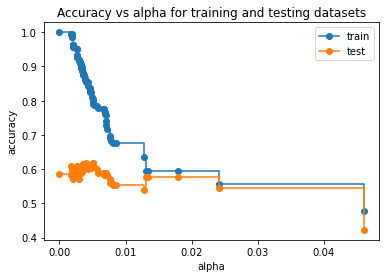

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing datasets')
ax.plot(ccp_alpha,train_score, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alpha,test_score, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

In [33]:
dt_model_ccp = DecisionTreeClassifier(random_state = 0, ccp_alpha=0.014)
dt_model_ccp.fit(x1, y1)

DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

[Text(558.0, 906.0, 'X[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(279.0, 543.6, 'X[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(139.5, 181.19999999999993, 'gini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(418.5, 181.19999999999993, 'gini = 0.271\nsamples = 90\nvalue = [0, 3, 76, 11, 0, 0]'),
 Text(837.0, 543.6, 'X[9] <= 0.545\ngini = 0.657\nsamples = 241\nvalue = [0, 4, 72, 112, 46, 7]'),
 Text(697.5, 181.19999999999993, 'gini = 0.408\nsamples = 32\nvalue = [0, 2, 24, 5, 1, 0]'),
 Text(976.5, 181.19999999999993, 'gini = 0.638\nsamples = 209\nvalue = [0, 2, 48, 107, 45, 7]')]

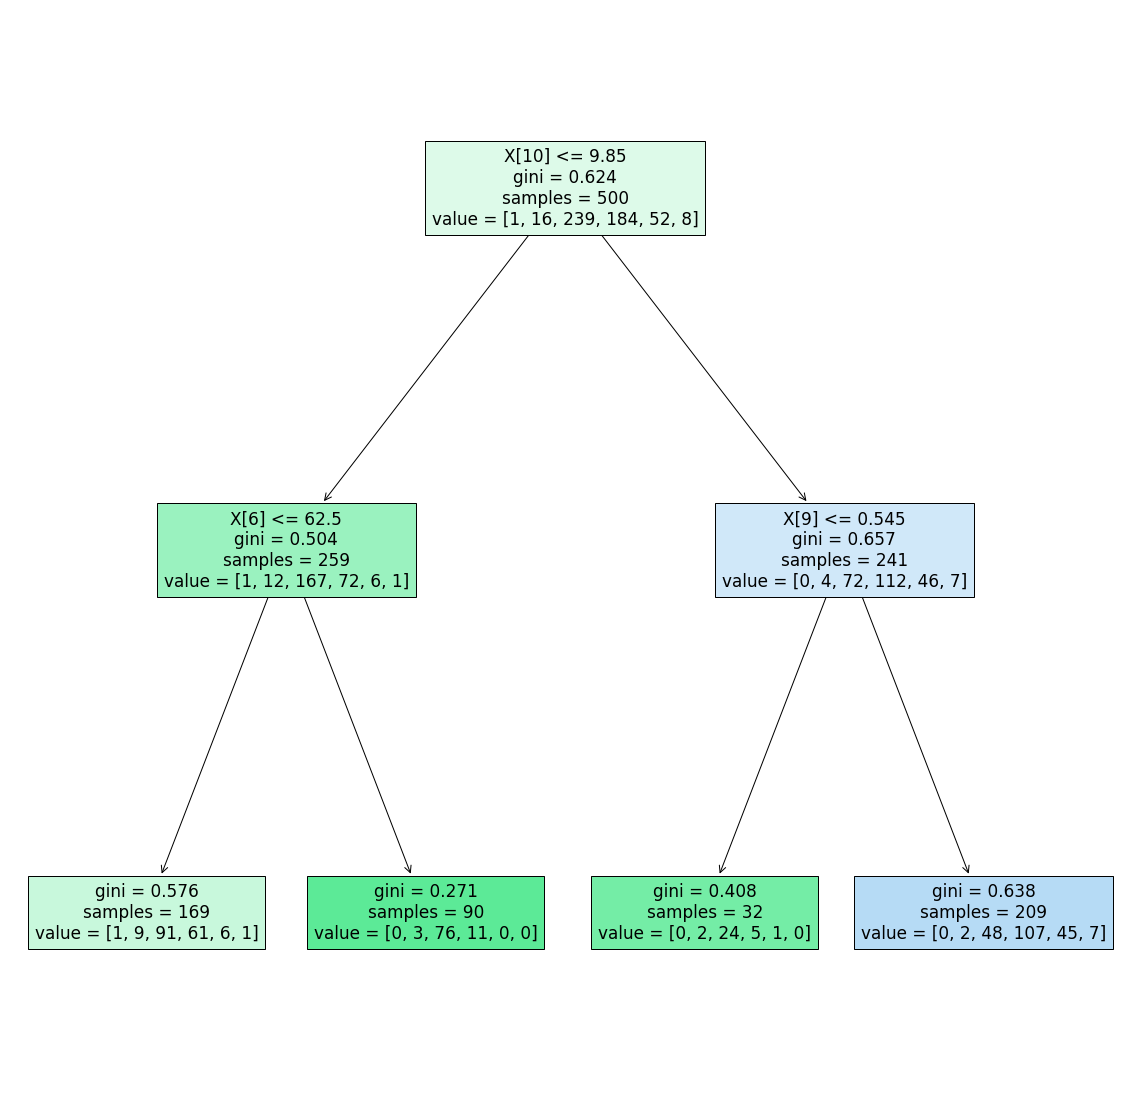

In [34]:
plt.figure(figsize = (20,20))
tree.plot_tree(dt_model_ccp, filled = True)

In [35]:
dt_model_ccp.score(x1, y1)

0.596

In [36]:
dt_model_ccp.score(x_test, y_test)

0.5775

In [37]:
grid_parm = {'criterion' : ['gini', 'entropy'], 
             'splitter' : ['best', 'random'],
             'max_depth' : range(2,40,1),
             'min_samples_split' : range(2,10,1),
             'min_samples_leaf' : range(1,10,1) 
    
}

In [38]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp, param_grid=grid_parm, cv = 5, n_jobs = -1)

In [39]:
grid_ccp.fit(x1,y1)

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.014, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [40]:
grid_ccp.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [41]:
dt_model_ccp_new = DecisionTreeClassifier(criterion= 'entropy', max_depth= 15, min_samples_leaf= 2, min_samples_split=2, splitter='random')
dt_model_ccp_new.fit(x1,y1)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       splitter='random')

In [42]:
dt_model_ccp_new.score(x1, y1)

0.884

In [43]:
dt_model_ccp_new.score(x_test, y_test)

0.59

In [44]:
pred = dt_model_ccp_new.predict(x_train)

In [45]:
confusion_matrix(y_train, pred)

array([[  0,   4,   3,   1,   0,   0],
       [  2,   9,  15,   6,   3,   0],
       [  1,  26, 388,  81,  14,   2],
       [  1,  15, 161, 261,  37,   2],
       [  0,   1,  31,  62,  58,   1],
       [  0,   0,   4,   5,   1,   4]], dtype=int64)

In [46]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [47]:
x = df.drop(columns = 'quality')
y = df.quality

In [48]:
from sklearn.ensemble import BaggingClassifier

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [62]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 100)
bag_dt.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [63]:
bag_dt.predict(x_test)

array([5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 5, 7, 7, 5, 5, 6, 6, 5,
       6, 7, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 7, 7, 5, 6, 6, 6, 5, 6, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 5, 7, 5, 7, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 5, 6,
       7, 7, 7, 5, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 6, 7, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6,

In [64]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [65]:
bag_dt.n_classes_

6

In [66]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [67]:
bag_dt.estimator_params

()

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators= 10)
bag_knn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [70]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 7, 6, 7, 5, 6, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 7, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 7, 7, 5, 5, 5, 6, 7, 5, 5, 6, 6, 5, 6, 5,
       5, 7, 7, 7, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 7, 5, 7, 7, 6, 5, 7, 6, 5, 7, 5, 5, 5, 5, 7, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 5, 7, 6, 5, 5, 5, 6, 6, 7, 6, 6, 5, 5, 6, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 6,
       7, 7, 7, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 4, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 8, 6, 5, 5, 6, 7, 6, 6, 5, 7, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5,

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf = RandomForestClassifier(n_estimators= 5)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [87]:
rf.score(x_test, y_test)

0.6175

In [88]:
bag_dt.score(x_test, y_test)

0.6725

In [89]:
bag_knn.score(x_test, y_test)

0.47

In [90]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=2048404840),
 DecisionTreeClassifier(max_features='auto', random_state=726711911),
 DecisionTreeClassifier(max_features='auto', random_state=1794077527),
 DecisionTreeClassifier(max_features='auto', random_state=1572632615),
 DecisionTreeClassifier(max_features='auto', random_state=264732585)]

In [91]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=2048404840)

[Text(582.0277125, 1058.5894736842106, 'X[2] <= 0.265\ngini = 0.65\nsamples = 763\nvalue = [5, 40, 497, 474, 171, 12]'),
 Text(239.34247499999998, 1001.3684210526317, 'X[10] <= 10.25\ngini = 0.591\nsamples = 396\nvalue = [4, 29, 315, 234, 35, 1]'),
 Text(62.714549999999996, 944.1473684210526, 'X[10] <= 9.15\ngini = 0.467\nsamples = 252\nvalue = [2, 12, 251, 101, 5, 0]'),
 Text(19.0464, 886.9263157894737, 'X[3] <= 1.8\ngini = 0.5\nsamples = 14\nvalue = [0, 4, 4, 16, 0, 0]'),
 Text(9.5232, 829.7052631578947, 'X[8] <= 3.335\ngini = 0.444\nsamples = 2\nvalue = [0, 1, 2, 0, 0, 0]'),
 Text(4.7616, 772.4842105263158, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(14.284799999999999, 772.4842105263158, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(28.569599999999998, 829.7052631578947, 'X[6] <= 29.0\ngini = 0.39\nsamples = 12\nvalue = [0, 3, 2, 16, 0, 0]'),
 Text(23.808, 772.4842105263158, 'gini = 0.0\nsamples = 1\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(33.331199999

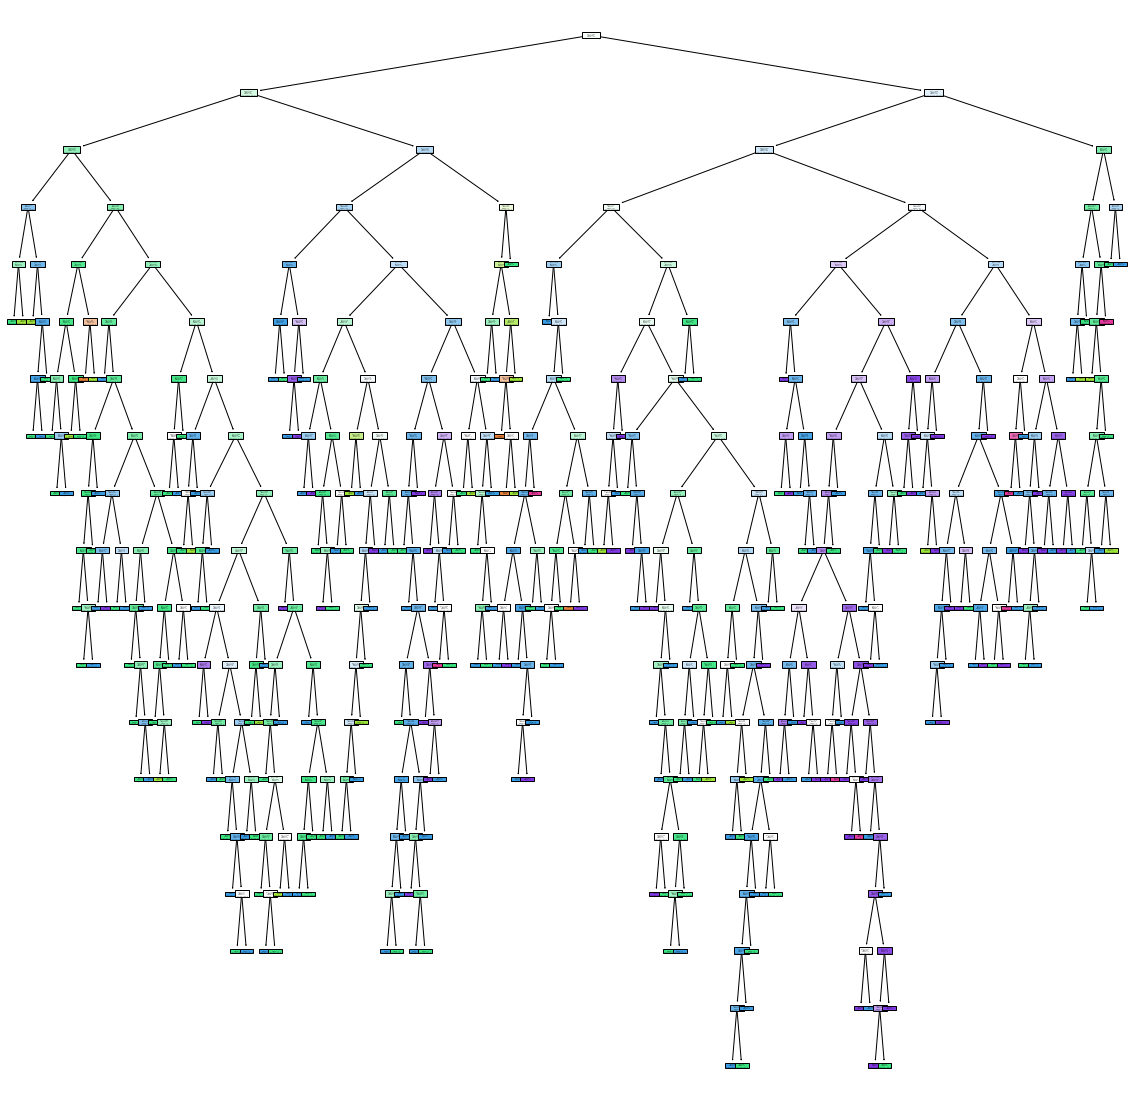

In [92]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf.estimators_[0], filled = True)

[Text(572.4895853169206, 1063.5652173913045, 'X[2] <= 0.375\ngini = 0.639\nsamples = 779\nvalue = [4, 34, 521, 469, 160, 11]'),
 Text(170.9686156828074, 1016.2956521739131, 'X[1] <= 0.375\ngini = 0.601\nsamples = 544\nvalue = [3, 30, 423, 337, 67, 4]'),
 Text(34.97366702937976, 969.0260869565218, 'X[10] <= 10.55\ngini = 0.597\nsamples = 47\nvalue = [0, 2, 11, 42, 21, 0]'),
 Text(19.429815016322088, 921.7565217391304, 'X[5] <= 27.0\ngini = 0.5\nsamples = 20\nvalue = [0, 2, 10, 21, 0, 0]'),
 Text(7.771926006528836, 874.4869565217392, 'X[9] <= 0.52\ngini = 0.185\nsamples = 12\nvalue = [0, 1, 1, 18, 0, 0]'),
 Text(3.885963003264418, 827.2173913043479, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(11.657889009793253, 827.2173913043479, 'X[8] <= 3.24\ngini = 0.1\nsamples = 11\nvalue = [0, 0, 1, 18, 0, 0]'),
 Text(7.771926006528836, 779.9478260869566, 'X[7] <= 0.998\ngini = 0.278\nsamples = 4\nvalue = [0, 0, 1, 5, 0, 0]'),
 Text(3.885963003264418, 732.6782608695653, 'gini = 0.

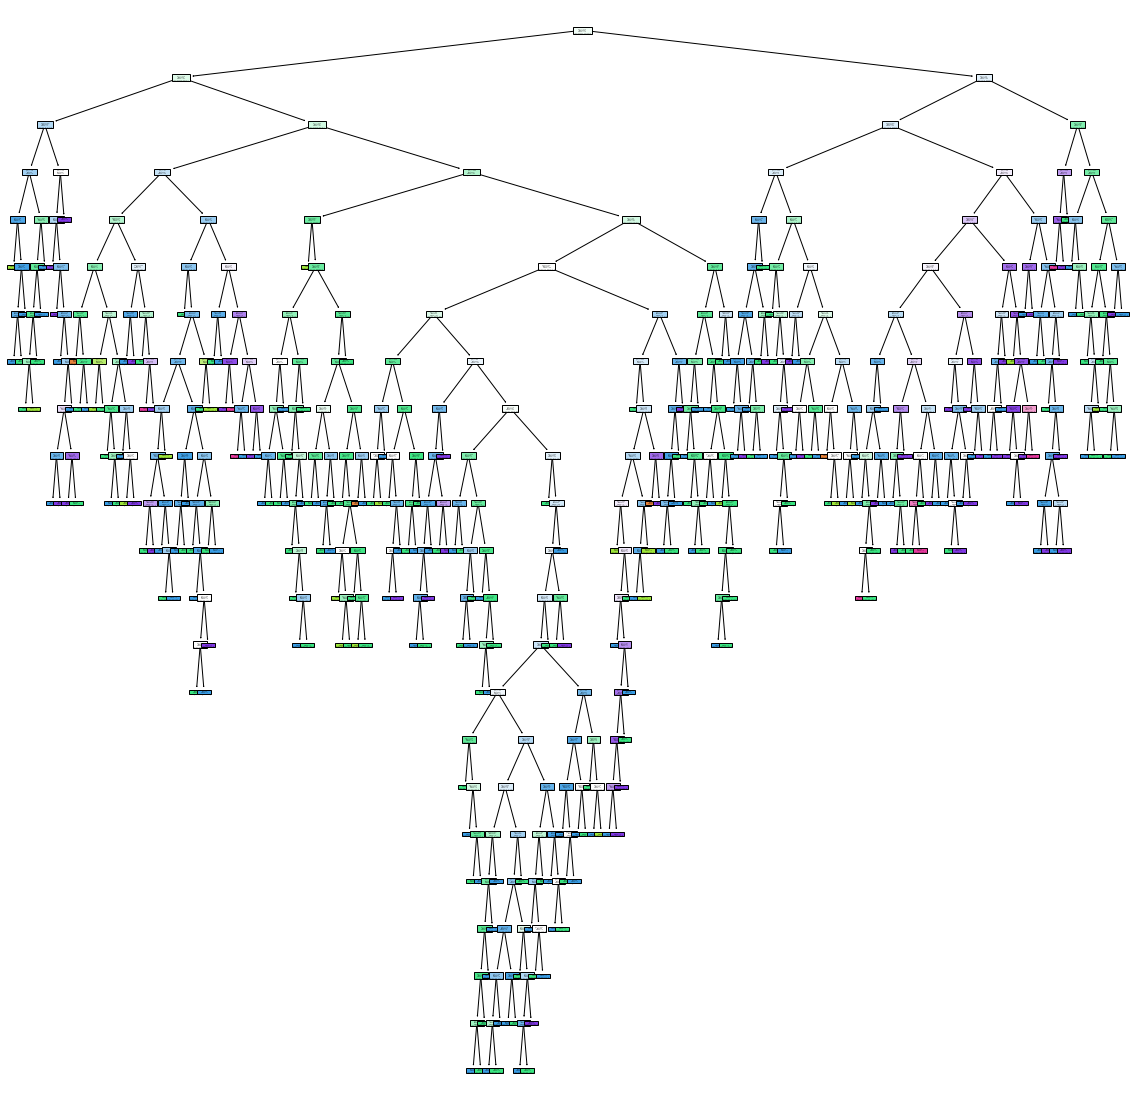

In [93]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf.estimators_[1], filled = True)

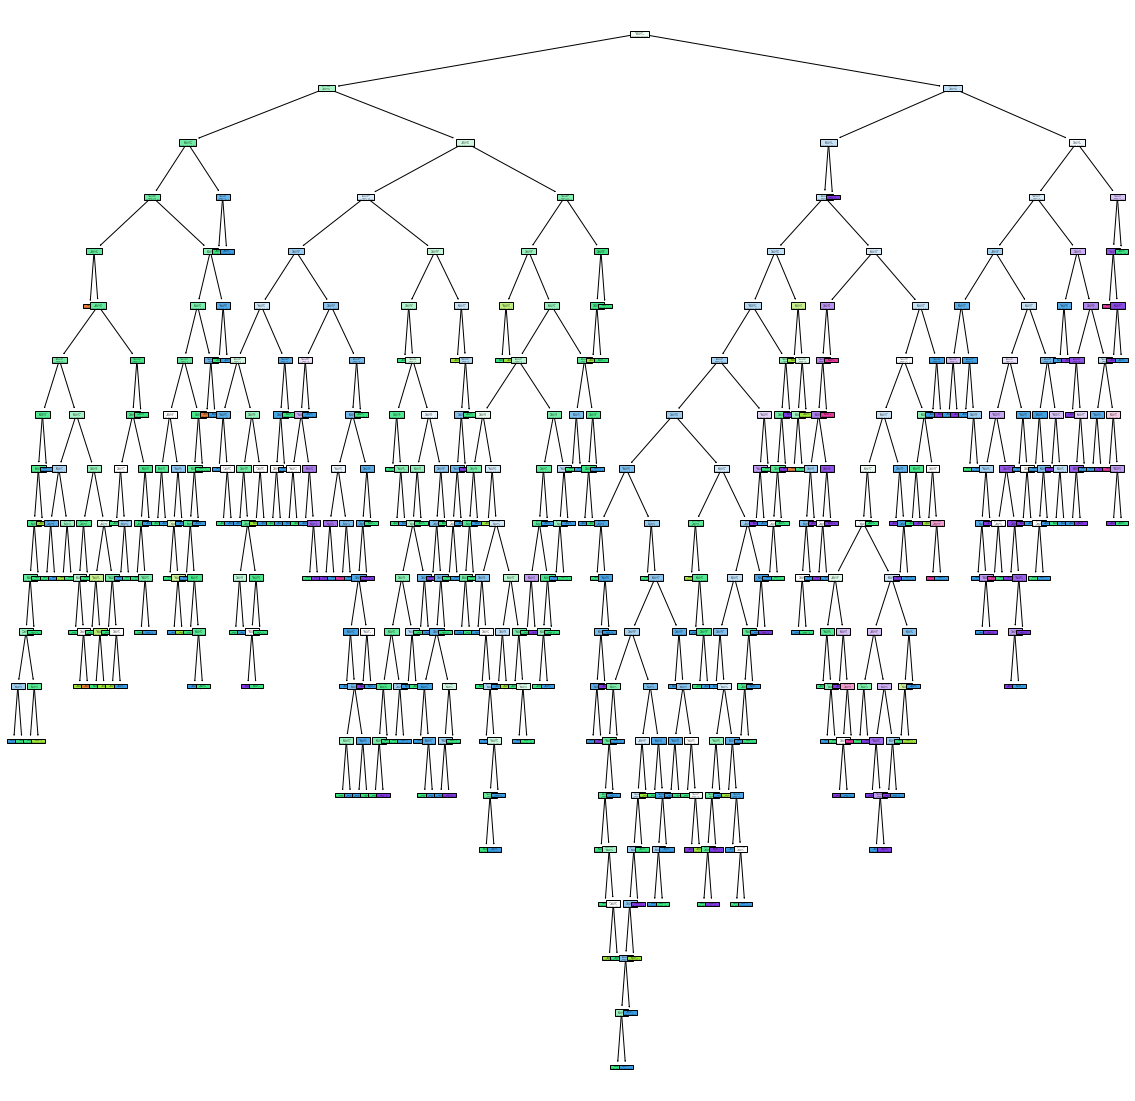

In [94]:
plt.figure(figsize = (20,20))
for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i], filled = True)

In [ ]:
GridSearchCV()

In [98]:
grid_para = {
    'n_estimators':[5,10,50,100,120,150],
    'criterion':['gini', 'entropy'],
    'max_depth':range(10),
    'min_samples_leaf' : range(10)
}

In [101]:
grid_search_rf = GridSearchCV(param_grid=grid_para, cv = 10, n_jobs = -1, verbose = 1, estimator = rf)

In [102]:
grid_search_rf.fit(x_train, y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.63470588 0.62387255 0.62721989]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [103]:
grid_search_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9)